# Results v5:

## General Hyperparameters:

- Dataset: MNIST (scaled down to 14x14)
- Model: 2-layer MLP (196-32-ReLU-10)
- Training batch size: 32
- Optimizer: SGD
- Learning rate: 0.001
- Epochs: 5

## GGN Hyperparameters:
- GGN batch sizes: $[2^i]_{i=0}^{12}$
- GGN computations after $n$ training steps: $n \in \{0, 4000, 8000\}$
- GGN samples per computation iteration: 8
- GGN approximation error measures: Frobenius-norm, Eigenspace-overlap

In [1]:
from pathlib import Path
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.ticker import LogFormatterExponent
from tueplots import bundles

plt.rcParams.update(bundles.beamer_moml())

In [22]:
results_path = "../results_v5/"
min_exp = 0
max_exp = 13
n_samples = 8
ggn_iteration_freq = 4000
num_ggn_iterations = 3
sampling_methods = ["uniform", "loss_classeq", "loss_classeq_inv"]

iterations = [ggn_iteration_freq * x for x in range(0, num_ggn_iterations)]
batch_sizes = [2**x for x in range(min_exp, max_exp)]

## Frobenius Norm of Hessian Matrices:

In [23]:
frobenius_distances_mean = {}
frobenius_distances_min = {}
frobenius_distances_max = {}

for sampling_method in sampling_methods:
    frobenius_distances_mean[sampling_method] = []
    frobenius_distances_min[sampling_method] = []
    frobenius_distances_max[sampling_method] = []
    for iters in iterations:
        frobenius_distances_mean[sampling_method].append([])
        frobenius_distances_min[sampling_method].append([])
        frobenius_distances_max[sampling_method].append([])
        for batch_size in batch_sizes:
            frobenius_distances = np.load(str(Path(results_path, sampling_method, f"H_f_norm_{batch_size}_batched_{iters}.npy")))
            frobenius_distances_mean[sampling_method][-1].append(frobenius_distances.mean())
            frobenius_distances_min[sampling_method][-1].append(frobenius_distances.min())
            frobenius_distances_max[sampling_method][-1].append(frobenius_distances.max())

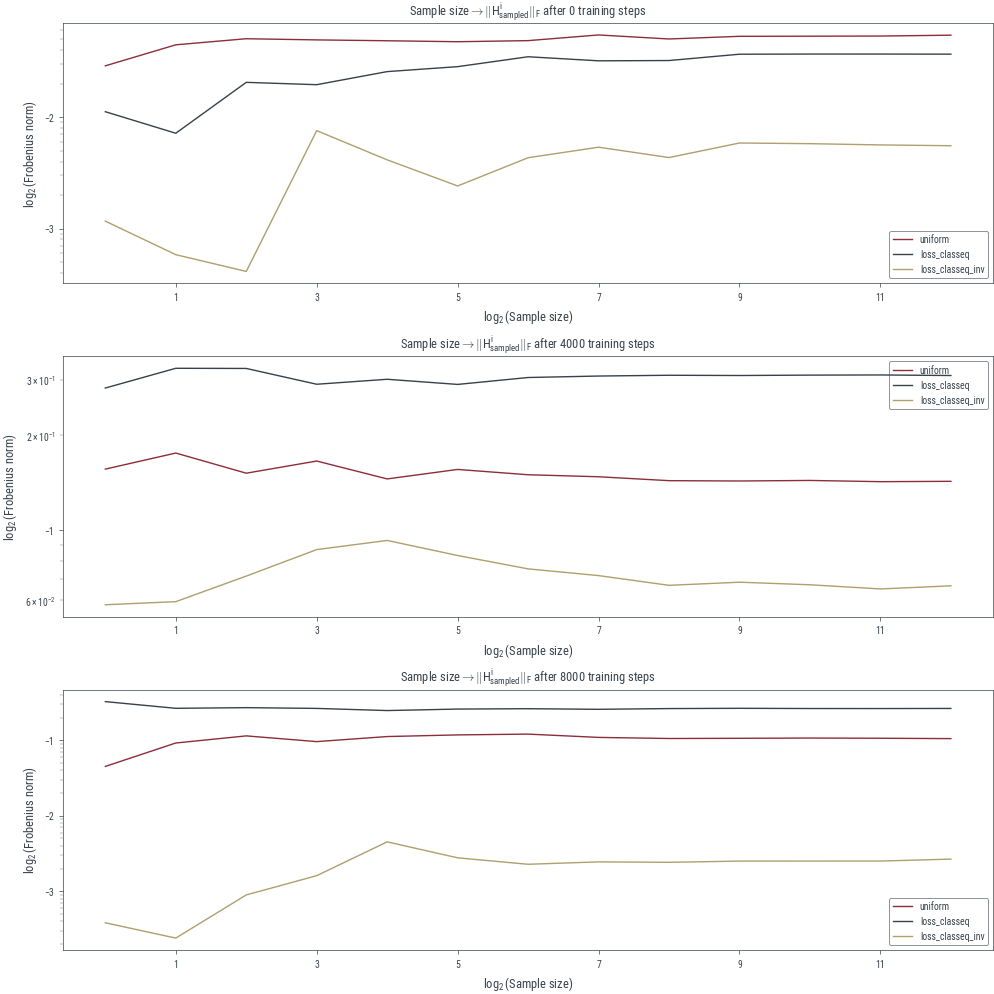

In [24]:

fig, axs = plt.subplots(num_ggn_iterations, figsize=(10, 10))

for iters_idx, iters in enumerate(iterations):
    for sampling_method in sampling_methods:
        axs[iters_idx].plot(batch_sizes, frobenius_distances_mean[sampling_method][iters_idx], label=sampling_method.removesuffix("_total"))
        #axs[iters_idx].fill_between(batch_sizes, frobenius_distances_min[sampling_method][0], frobenius_distances_max[sampling_method][0], alpha=0.5)
    axs[iters_idx].set_title("$\\text{Sample size} \\to \|H^{i}_{\\text{sampled}}\|_F$ after " + str(iters) + " training steps")
    axs[iters_idx].set_xscale('log', base=2)
    axs[iters_idx].set_yscale("log")
    axs[iters_idx].set_xlabel("$\\log_2{(\\text{Sample size})}$")
    axs[iters_idx].set_ylabel("$\\log_2{(\\text{Frobenius norm})}$")
    xlogfmt = LogFormatterExponent(base=2, labelOnlyBase=True)
    ylogfmt = LogFormatterExponent(base=10, labelOnlyBase=True)
    axs[iters_idx].xaxis.set_major_formatter(xlogfmt)
    axs[iters_idx].yaxis.set_major_formatter(ylogfmt)
    axs[iters_idx].legend();

## Eigenspace overlap:

In [25]:
iterations = [ggn_iteration_freq * x for x in range(0, num_ggn_iterations)]
batch_sizes = [2**x for x in range(min_exp, max_exp)]

frobenius_distances = {}
eig_overlap = {}

for sampling_method in sampling_methods:
    frobenius_distances[sampling_method] = []
    eig_overlap[sampling_method] = []
    for iters in iterations:
        frobenius_distances[sampling_method].append([])
        eig_overlap[sampling_method].append([])
        for batch_size in batch_sizes:
            frobenius_distances[sampling_method][-1].append(np.load(str(Path(results_path, sampling_method, f"f_norm_{batch_size}_batched_{iters}.npy"))).flatten())
            eig_overlap[sampling_method][-1].append(np.load(str(Path(results_path, sampling_method, f"eig_overlap_{batch_size}_batched_{iters}.npy"))).flatten())
        eig_overlap[sampling_method][-1] = np.nan_to_num(np.stack(eig_overlap[sampling_method][-1]))

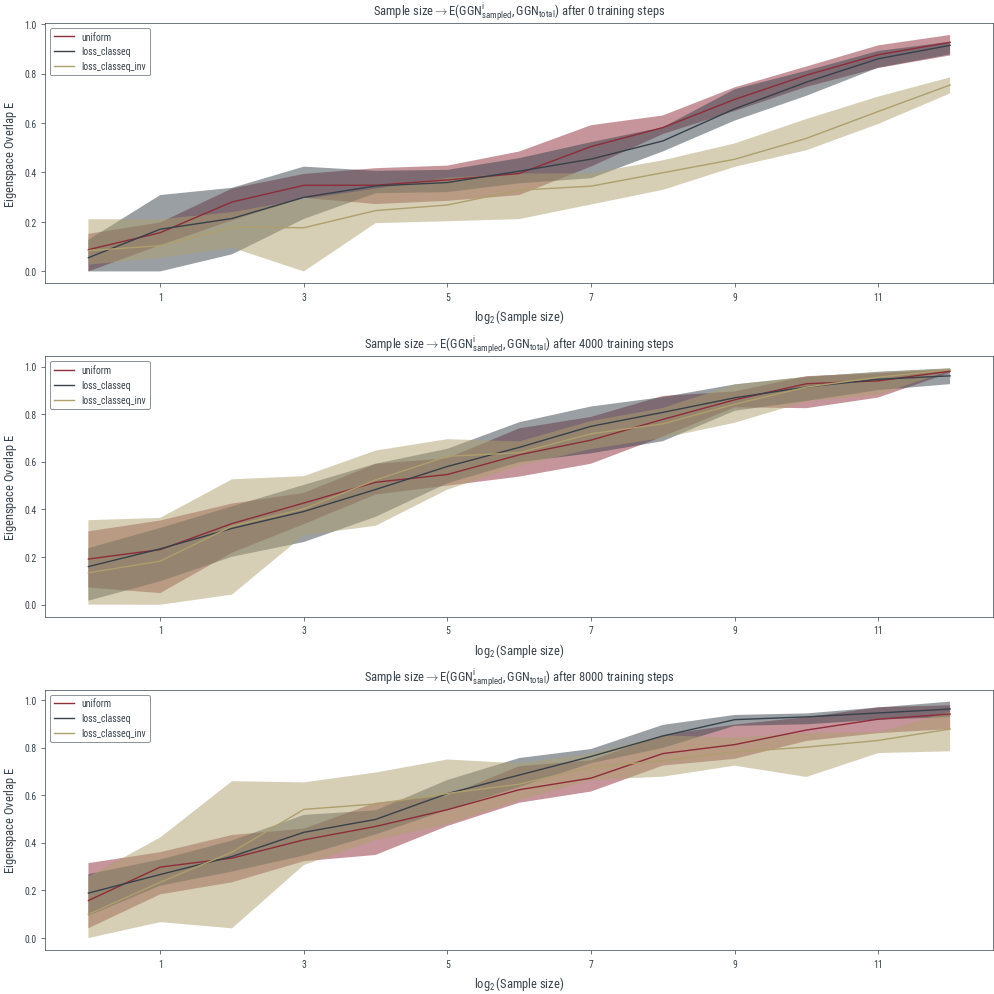

In [26]:
fig, axs = plt.subplots(num_ggn_iterations, figsize=(10, 10))

for iters_idx, iters in enumerate(iterations):
    for sampling_method in sampling_methods:
        axs[iters_idx].plot(batch_sizes, eig_overlap[sampling_method][iters_idx].mean(axis=1), label=sampling_method)
        axs[iters_idx].fill_between(batch_sizes, np.min(eig_overlap[sampling_method][iters_idx], axis=1), np.max(eig_overlap[sampling_method][iters_idx], axis=1), alpha=0.5)
    axs[iters_idx].set_title("$\\text{Sample size} \\to E(\\text{GGN}^{i}_{\\text{sampled}}, \\text{GGN}_{\\text{total}})$ after " + str(iters) + " training steps")
    axs[iters_idx].set_xscale('log', base=2)
    axs[iters_idx].set_xlabel("$\\log_2{(\\text{Sample size})}$")
    xlogfmt = LogFormatterExponent(base=2, labelOnlyBase=True)
    axs[iters_idx].xaxis.set_major_formatter(xlogfmt)
    axs[iters_idx].set_ylabel("$\\text{Eigenspace Overlap E}$")
    axs[iters_idx].legend();